# 2. Data Selection (TPE)
資料選取 (依各個欄位處理)   
2-1. Purpose (主要用途)   
2-2. Type (建物類型)     
2-3. Remarks (備註)   
2-4. Parking Area (車位面積)  
2-5. Urban Zoning   
2-6. Drop columns    

In [1]:
#載入套件
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno

#匯入文字雲套件
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#匯入自己寫的程式
import dataframe_format as ff
import data_selection as ds

In [2]:
#匯入檔案 (已執行過 "01_DataProfile_TPE")
df = pd.read_csv('1_dataprofile.csv', low_memory=False)
df.info()
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220815 entries, 0 to 220814
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Column1               220815 non-null  int64  
 1   District              220815 non-null  object 
 2   Subject               220815 non-null  object 
 3   Address               220815 non-null  object 
 4   LandArea              220815 non-null  float64
 5   UrbanZoning           219519 non-null  object 
 6   NonUrbanZoning        29 non-null      object 
 7   NonUrbanDesignation   0 non-null       float64
 8   TransactionDate       220815 non-null  int64  
 9   NumberOfTransactions  220815 non-null  object 
 10  Floor                 220571 non-null  object 
 11  Storeys               220325 non-null  object 
 12  Type                  220815 non-null  object 
 13  Purpose               216486 non-null  object 
 14  Material              220763 non-null  object 
 15  

# 2-1. Purpose (主要用途)
刪除非居住用途的房屋交易

In [3]:
#查看 purpose 有多少種類
print(len(df['Purpose'].unique()))
print(df['Purpose'].unique())

19
['住家用' '商業用' '國民住宅' '見其他登記事項' nan '見使用執照' '住商用' '農舍' '工業用' '停車空間' '工商用'
 '住工用' '自由職業事務所' '一般事務所' '辦公用' '其他' '農業用' '商辦用' '住商辦用']


In [4]:
#刪除 purpose 非住宅用的筆數
df = ds.drop_rows_purposes(df)

Drop the rows, where the Purpose is not for living...
Finish!
保留項目: {'住家用', '住商辦用', '住工用', '住商用'}
刪除項目: {nan, '農業用', '農舍', '國民住宅', '辦公用', '停車空間', '其他', '商辦用', '商業用', '自由職業事務所', '工業用', '一般事務所', '工商用', '見其他登記事項', '見使用執照'}


# 2-2. Type (建物類型)
刪除非居住用途的房屋交易

In [5]:
#查看Type有多少種類
print(len(df['Type'].unique()))
print(df['Type'].unique())

12
['住宅大樓(11層含以上有電梯)' '華廈(10層含以下有電梯)' '公寓(5樓含以下無電梯)' '套房(1房1廳1衛)' '辦公商業大樓'
 '店面(店鋪)' '透天厝' '其他' '廠辦' '農舍' '工廠' '倉庫']


In [6]:
#刪除Type中，非住宅使用的筆數
df = ds.drop_rows_type(df)

Drop the rows, where the Type is not 公寓, 住宅大樓, 套房, 透天, 華廈...
Finish!


In [7]:
#查看留下的Type種類
print(len(df['Type'].unique()))
print(df['Type'].unique())

5
['住宅大樓(11層含以上有電梯)' '華廈(10層含以下有電梯)' '公寓(5樓含以下無電梯)' '套房(1房1廳1衛)' '透天厝']


# 2-3. Remarks (備註)
刪除親友交易，債務轉移的交易

In [8]:
#查看Remarks內容
df_rm = df['Remarks'].unique()
print(len(df_rm))
print(pd.Series(df_rm).head(10))

11330
0                                                  NaN
1                                  1.價格含增建2.其中一衛為0.5衛浴
2                                                價格含增建
3                                            公開標售、開放格局
4                                               價格含增建。
5                                                 伯姪買賣
6    本買賣案件係屬三親等間特殊交易，其交易價格可能異於市場正常交易價格。為尊重權利人隱私權主張，...
7                                         1.本案為預售屋買賣案件
8                                           本交易標的含頂樓加蓋
9                                                二等親買賣
dtype: object


# 原文字雲 Remarks

In [9]:
# Combine all 'Type' entries into a single string
type_str = df['Remarks'].str.cat(sep='')
print(type_str[:50])

# Tokenize the text using jieba
seg_list = jieba.lcut(type_str)

1.價格含增建2.其中一衛為0.5衛浴價格含增建公開標售、開放格局價格含增建。伯姪買賣價格含增建本買


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.409 seconds.
Prefix dict has been built successfully.


In [10]:
#查看切詞
print(len(seg_list))
print(seg_list[:10])

829648
['1', '.', '價格', '含', '增建', '2', '.', '其中', '一衛為', '0.5']


In [11]:
# 移除停留詞
file_name = 'data/stop_words.txt'
seg_list = ds.remove_stop_words(file_name, seg_list)
print('seg_list after remove stop words: ', seg_list[:5])

seg_list after remove stop words:  ['增建', '衛浴', '增建', '公開', '標售']


In [12]:
# 統計詞頻   
sef_freq = ds.count_segment_freq(seg_list)
sef_freq.head(20)

,count
seg,
增建,47827
特殊,17603
員工,17073
親友,16947
陽台,13054
預售屋,4794
車位,4391
分件,4103
頂樓,3476


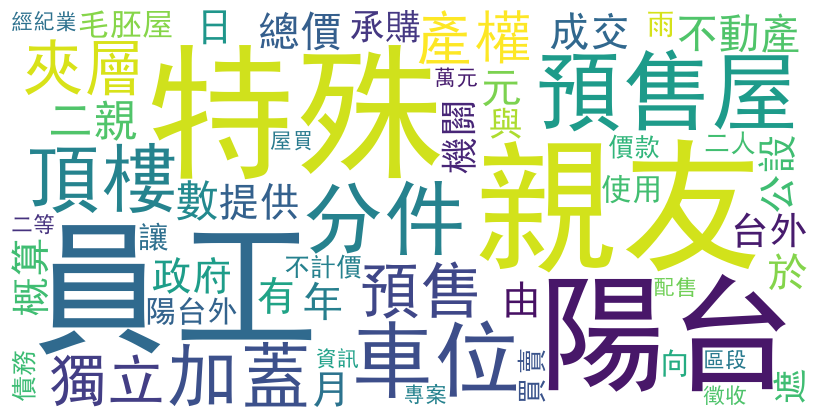

In [13]:
# Create a WordCloud object
text = ' '.join(seg_list)

wc = WordCloud(font_path='data/simhei.ttf', width=800, height=400, max_words=100, collocations=False,
                      background_color='white', min_font_size=20, max_font_size=150,
                       stopwords=STOPWORDS.add('增建')).generate(text)

# Display the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 移除親友交易後的文字雲

In [14]:
# 刪除 Remarks 欄位， 刪除沒有價格的筆數
df = ds.drop_rows_remarks(df)

Drop the Family Transaction rows...
Finish!
Nums of Kept Strings: 151952
Nums of Deleted Strings: 18858


seg_list after remove stop words:  ['增建', '衛浴', '增建', '公開', '標售']


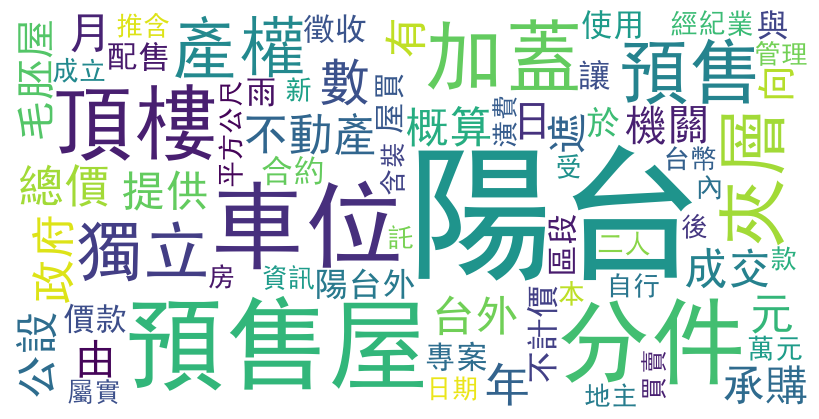

In [15]:
# Combine all 'Type' entries into a single string
type_str = df['Remarks'].str.cat(sep='')

# Tokenize the text using jieba
seg_list = jieba.lcut(type_str)

# 移除停留詞
file_name = 'data/stop_words.txt'
seg_list = ds.remove_stop_words(file_name, seg_list)
print('seg_list after remove stop words: ', seg_list[:5])

# 統計詞頻   
sef_freq = ds.count_segment_freq(seg_list)
sef_freq.head(20)

# Create a WordCloud object
text = ' '.join(seg_list)

wc = WordCloud(font_path='data/simhei.ttf', width=800, height=400, max_words=100, collocations=False,
                      background_color='white', min_font_size=20, max_font_size=150,
                       stopwords=STOPWORDS.add('增建')).generate(text)

# Display the WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
#移除欄位 Remarks
#df.drop(['Remarks'], axis=1, inplace=True)
# Save
df.to_csv('remarks.csv', encoding='utf-8-sig', index=False)
df = pd.read_csv('remarks.csv', low_memory=False)

# 2-4. Parking Area
合併欄位: 車位面積

<Axes: >

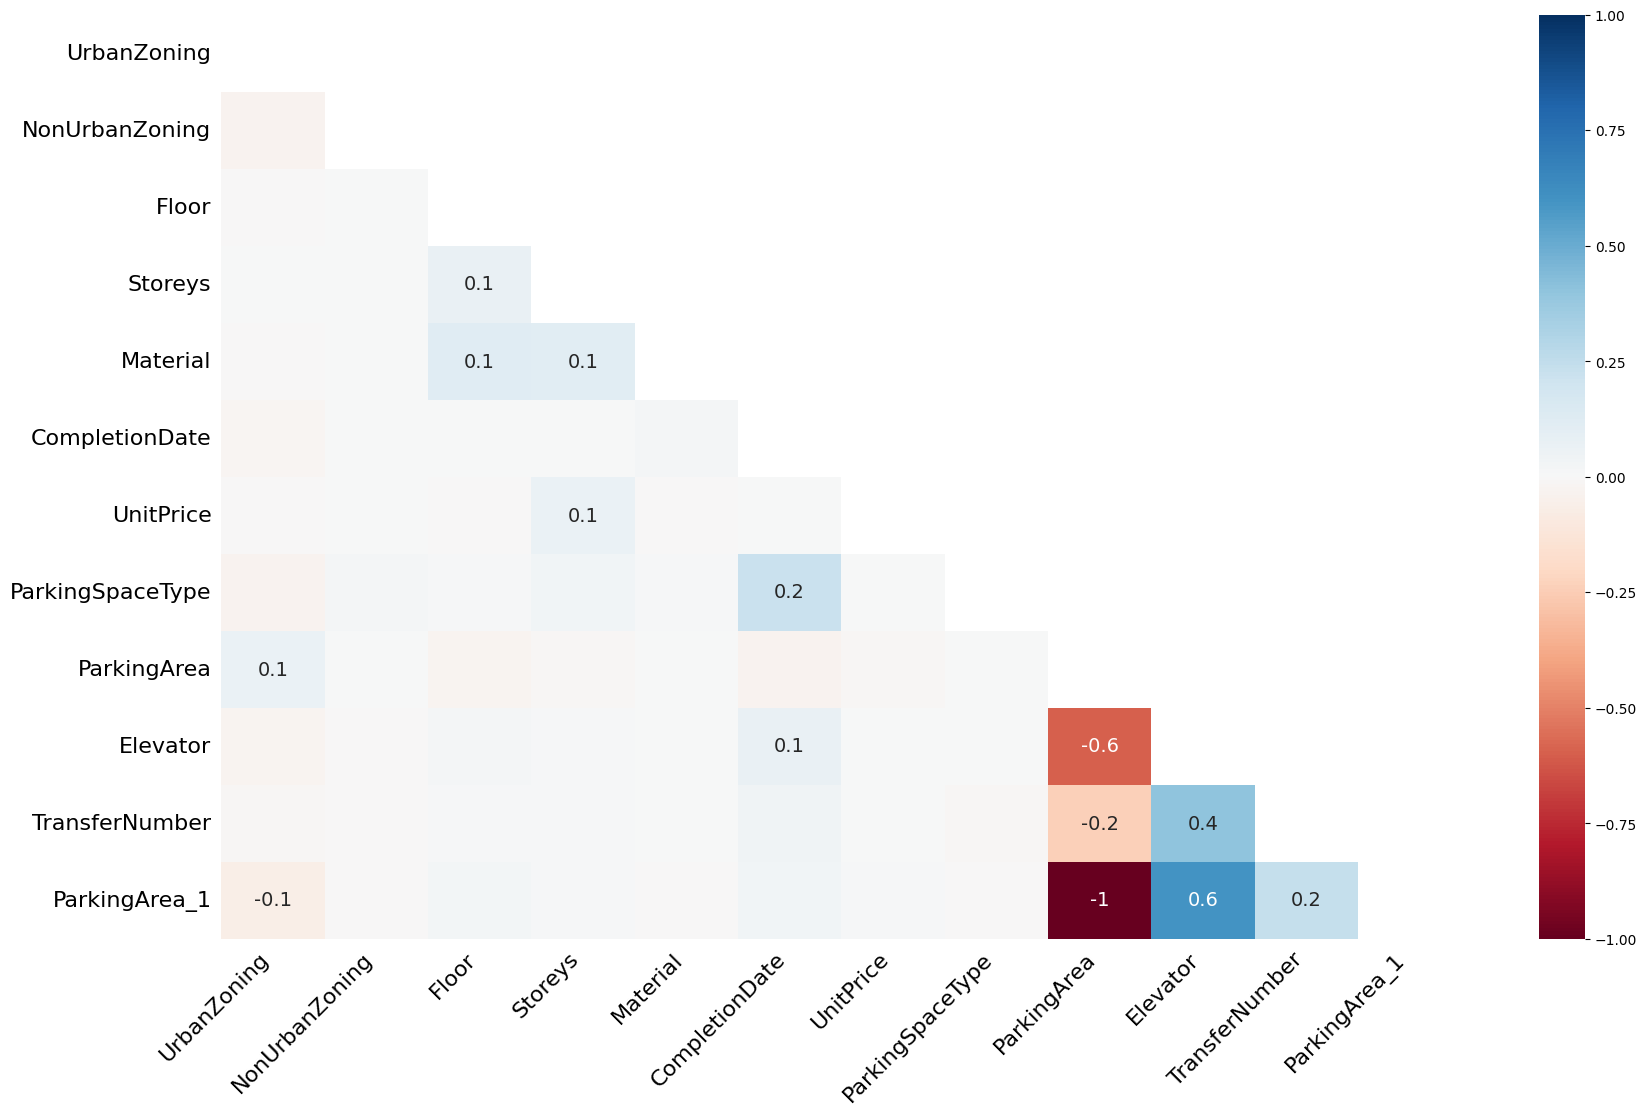

In [17]:
#缺失值相關係數熱圖 Correlation heatmap
msno.heatmap(df)

In [18]:
df = ds.merge_parking_area(df)

合併"車位移轉總面積(平方公尺)"...
Finish!
整合後空值數量: 0


# 2-5. Urban Zoning

In [19]:
df = ds.urban_zoning(df)

UrbanZoning...
Finish!
fill 'UrbanZoning' from 'NonUrbanZoning': 6 
fill 'UrbanZoning' from 'NonUrbanDesignation': 0 
Missing Value of 'UrbanZoning': 822


In [20]:
#df = ds.drop_price_null(df)

# 2-6. Drop columns

In [21]:
#各欄位缺失植數量
missing_values = df.isna().sum()
#print(missing_values)
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)
print(len(df))

UrbanZoning            822
Floor                  141
Storeys                315
Material                24
CompletionDate       11653
UnitPrice               19
ParkingSpaceType     92912
Elevator            106171
TransferNumber      141927
dtype: int64
151952


In [22]:
#刪除欄位
df.drop(['Column1', 'TransferNumber'], axis=1, inplace=True)

In [23]:
# 移除欄位 ParkingSpaceType (遺失數量過多)
df.drop(['ParkingSpaceType'], axis=1, inplace=True)

In [24]:
# 重新整理欄位順序
df.info()
df = ff.reindex_columns(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151952 entries, 0 to 151951
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   District              151952 non-null  object 
 1   Subject               151952 non-null  object 
 2   Address               151952 non-null  object 
 3   LandArea              151952 non-null  float64
 4   UrbanZoning           151130 non-null  object 
 5   TransactionDate       151952 non-null  int64  
 6   NumberOfTransactions  151952 non-null  object 
 7   Floor                 151811 non-null  object 
 8   Storeys               151637 non-null  object 
 9   Type                  151952 non-null  object 
 10  Purpose               151952 non-null  object 
 11  Material              151928 non-null  object 
 12  CompletionDate        140299 non-null  float64
 13  TotalArea             151952 non-null  float64
 14  Bedrooms              151952 non-null  int64  
 15  

In [25]:
df.to_csv('2_data_selection.csv', encoding='utf-8-sig', index=False)

# 缺失值 matrix

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151952 entries, 0 to 151951
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Identifier            151952 non-null  object 
 1   Address               151952 non-null  object 
 2   District              151952 non-null  object 
 3   Type                  151952 non-null  object 
 4   UrbanZoning           151130 non-null  object 
 5   Purpose               151952 non-null  object 
 6   Material              151928 non-null  object 
 7   NumberOfTransactions  151952 non-null  object 
 8   Storeys               151637 non-null  object 
 9   Floor                 151811 non-null  object 
 10  CompletionDate        140299 non-null  float64
 11  TransactionDate       151952 non-null  int64  
 12  Bedrooms              151952 non-null  int64  
 13  LivingRooms           151952 non-null  int64  
 14  Bathrooms             151952 non-null  int64  
 15  

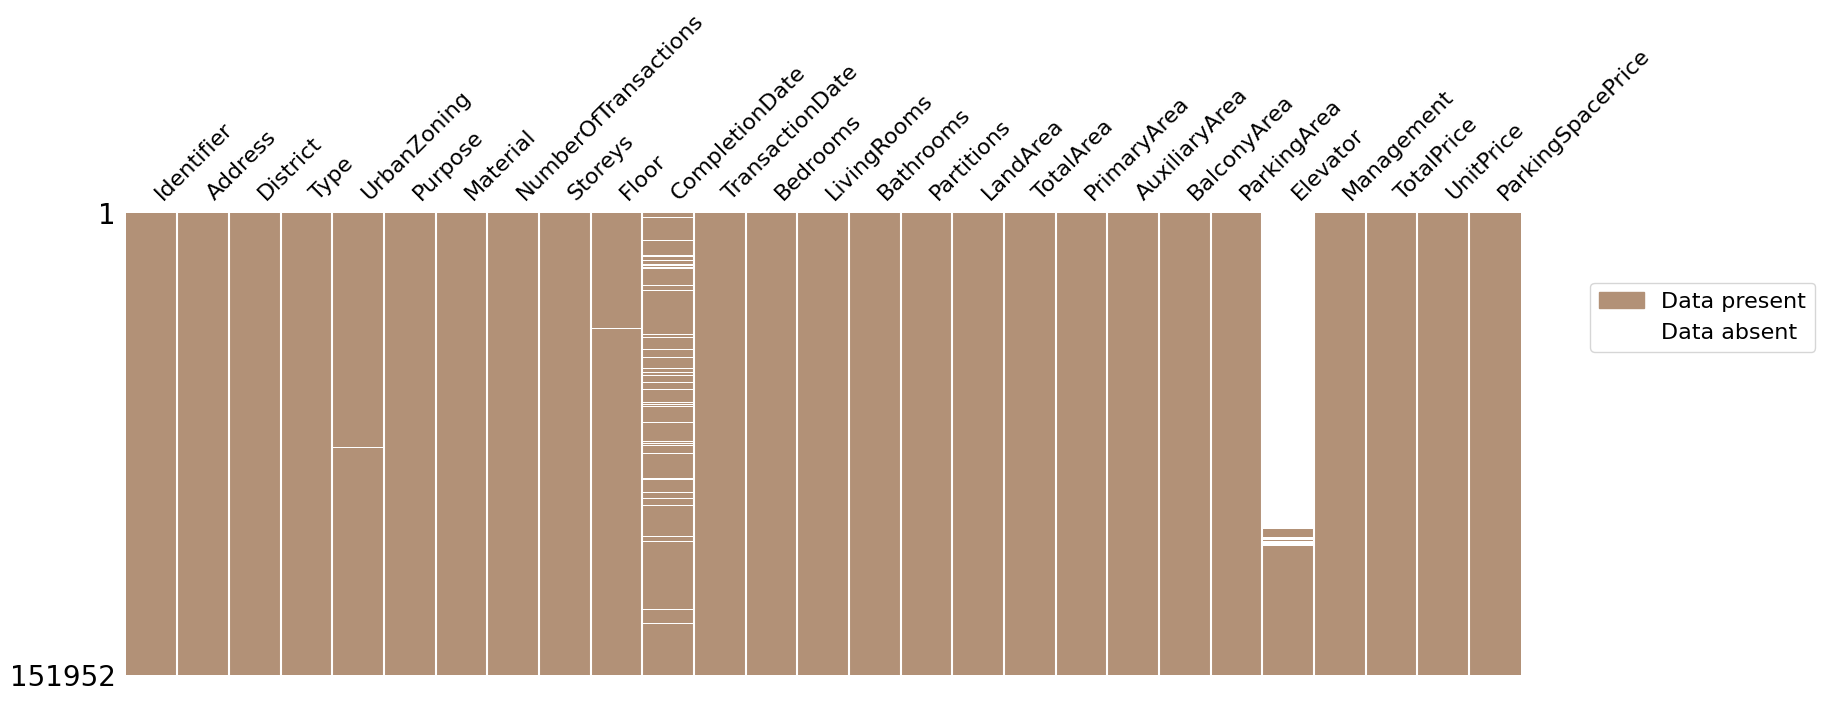

In [27]:
msno.matrix(df, sparkline=False, figsize=(18,6), fontsize=16, color=(0.7, 0.57, 0.47));
gray_patch = mpatches.Patch(color='#B29177', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent')
plt.legend(loc=[1.05,0.7], handles=[gray_patch, white_patch], fontsize=16)
plt.show()

In [28]:
#各欄位缺失植數量
missing_values = df.isna().sum()
#print(missing_values)
missing_value_true = missing_values[missing_values > 1]
print(missing_value_true)
print(len(df))

UrbanZoning          822
Material              24
Storeys              315
Floor                141
CompletionDate     11653
Elevator          106171
UnitPrice             19
dtype: int64
151952
